In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

import healpy as hp
from matplotlib.colors import LogNorm

In [2]:
params = {'legend.fontsize': 'large',
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [12]:
sweep_list = sorted(glob.glob('/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0/*.fits'))
sweep_list = [os.path.basename(fn).replace('.fits', '') for fn in sweep_list]

gaia_stack = []
cat_stack = []
for sweep_fn in sweep_list:
    
    if not os.path.isfile('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr9_north_cross_match/'+sweep_fn+'-gaia.fits'):
        continue
    gaia = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr9_north_cross_match/'+sweep_fn+'-gaia.fits'))
    cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/data/gaia_dr3/dr9_north_cross_match/'+sweep_fn+'-ls.fits'))
    print(len(gaia))

    mask = gaia['PHOT_G_MEAN_MAG']<17.65
    gaia = gaia[mask]
    cat = cat[mask]
    print(len(gaia))

    # maskbits = [0, 2, 3, 4, 5, 6, 7, 10, 12, 13]
    maskbits = [0, 1, 10, 12, 13]
    mask_clean = np.ones(len(cat), dtype=bool)
    for bit in maskbits:
        mask_clean &= (cat['MASKBITS'] & 2**bit)==0
    print(np.sum(~mask_clean)/len(mask_clean))
    gaia = gaia[mask_clean]
    cat = cat[mask_clean]
    print(len(gaia))

    mask = (cat['FLUX_G']>0) & (cat['FLUX_R']>0) & (cat['FLUX_Z']>0)
    mask &= (cat['FLUX_IVAR_G']>0) & (cat['FLUX_IVAR_R']>0) & (cat['FLUX_IVAR_Z']>0)
    mask &= (cat['FRACFLUX_G']<0.1) & (cat['FRACFLUX_R']<0.1) & (cat['FRACFLUX_Z']<0.1)
    gaia = gaia[mask]
    cat = cat[mask]
    print(len(gaia))
    
    gaia_stack.append(gaia)
    cat_stack.append(cat)
    print()

gaia = vstack(gaia_stack)
cat = vstack(cat_stack)

6973
6876
0.06573589296102385
6424
0

7733
7643
0.06725107941907628
7129
0

56
56
0.10714285714285714
50
0

171
166
0.0963855421686747
150
0

5051
5040
0.08035714285714286
4635
0

2940
2923
0.08279165241190557
2681
0

6912
6866
0.08913486746286048
6254
2981

6964
6911
0.08580523802633483
6318
3078

315
313
0.08306709265175719
287
0

3711
3684
0.08849077090119435
3358
1327

4033
4007
0.09333666084352384
3633
1337

5167
5159
0.050009691800736576
4901
0

10572
10556
0.059113300492610835
9932
3165

5398
5386
0.05068696620868919
5113
413

857
855
0.0456140350877193
816
0

7985
7980
0.05726817042606516
7523
4248

42485
42448
0.05580946098756125
40079
31548

66412
66351
0.05710539404078311
62562
52887

80545
80471
0.0590647562475923
75718
67153

73698
73606
0.061204249653560854
69101
63142

85466
85317
0.05771417185320628
80393
77166

53166
53059
0.054674984451271225
50158
43638

41569
41408
0.05320227975270479
39205
34586

6790
6771
0.048294195835179445
6444
3986

11035
10994
0.0651264325995

34186
33711

33889
33648
0.06939491203043271
31313
30882

31046
30799
0.0724049482126043
28569
28218

27711
27531
0.0743888707275435
25483
25176

25259
25073
0.07179037211342879
23273
22994

21947
21762
0.06640014704530833
20317
19996

19346
19227
0.0744265876111718
17796
17486

16947
16829
0.07219680313744133
15614
15305

13537
13459
0.07429972509101716
12459
12233

8842
8796
0.06946339245111414
8185
7630

1965
1954
0.0496417604912999
1857
0

51876
51544
0.06120984013658234
48389
30914

49029
48750
0.06857435897435897
45407
44845

43853
43572
0.07013678509134307
40516
40042

38779
38521
0.07193478881648971
35750
35357

34046
33837
0.06956881520229334
31483
31060

29985
29816
0.07271263751006171
27648
27284

25799
25622
0.06931543205058154
23846
23463

22582
22424
0.065643952907599
20952
20605

19237
19146
0.07098088373550611
17787
17518

14893
14813
0.07243637345574833
13740
13526

8362
8333
0.06696267850714029
7775
7056

59239
58975
0.06095803306485799
55380
43640

70188
69868
0.1007

In [13]:
print(len(cat))

6344979


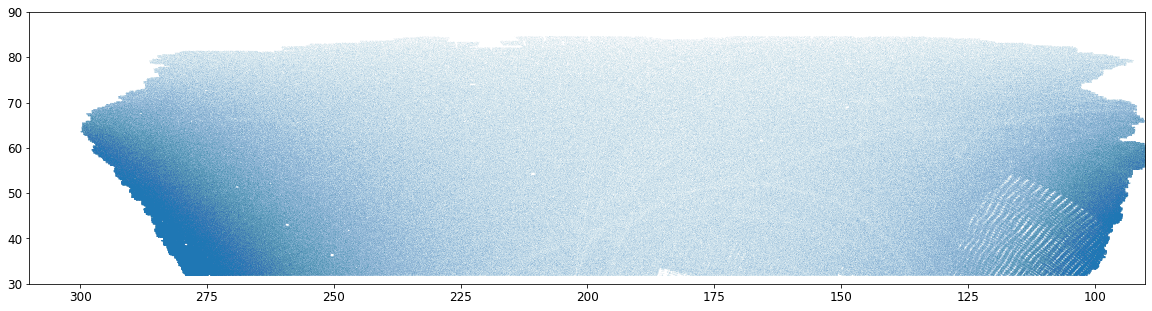

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(cat['RA'], cat['DEC'], '.', ms=0.1, alpha=0.1)
plt.axis([310, 90, 30, 90])
plt.show()

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cat['gmag'] = 22.5 - 2.5*np.log10(cat['FLUX_G'])
    cat['rmag'] = 22.5 - 2.5*np.log10(cat['FLUX_R'])
    cat['zmag'] = 22.5 - 2.5*np.log10(cat['FLUX_Z'])
    gaia['gmag'] = 22.5 - 2.5*np.log10(gaia['flux_g'])
    gaia['rmag'] = 22.5 - 2.5*np.log10(gaia['flux_r'])
    gaia['zmag'] = 22.5 - 2.5*np.log10(gaia['flux_z'])

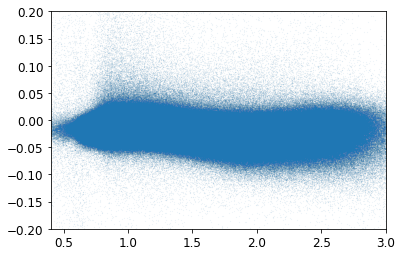

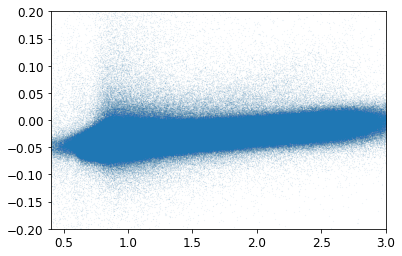

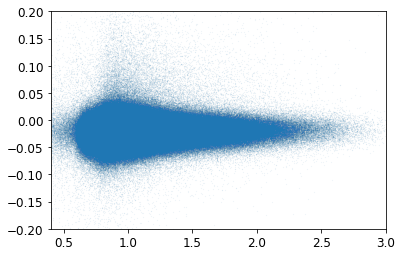

In [19]:
mask = (cat['ANYMASK_G']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['gmag']-gaia['gmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_R']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['rmag']-gaia['rmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

mask = (cat['ANYMASK_Z']==0)
plt.plot(gaia['PHOT_BP_MEAN_MAG'][mask]-gaia['PHOT_RP_MEAN_MAG'][mask], (cat['zmag']-gaia['zmag'])[mask], '.', ms=00.1, alpha=0.5)
plt.axis([0.4, 3., -0.2, 0.2])
plt.show()

In [20]:
import statsmodels.api as sm

def rlm_fit1d(x, y, t=1.5, order=1):
    '''
    1D robust polynomial fit.
    
    Given x array and y array, calculate the 1D robust 
    polynomial fit of arbitrary order. Huber weight
    function is used. 
    
    See also poly_val1d.py
    
    INPUT:
    1D arrays of x and y values; tunning parameter t; 
    order of the polynomial fit.
    
    OUTPUT:
    Array of parameters of the polynomial [a0, a1, a2 ...] 
    so that y = a0 + a1*x + a2*x**2 + ...
    '''
    
    ncols = order+1
    a = np.zeros((x.size,ncols))
    for i in range(order+1):
        a[:,i] = x**i
    res = sm.RLM(y, a, M=sm.robust.norms.HuberT(t=t)).fit()
    m = res.params
    return(m)

def poly_val1d(x, m):
    '''
    Evaluate the 1D polynomial from x values and polynomial parameters
    
    See also rlm_fit1d.py
    
    INPUT:
    1D array of x values; 
    1D array of polynomial parameters (for example generated by 
    rlm_fit1d.py).
    
    OUTPUT:
    1D array of the evaluated values of the polynomial.
    '''
    
    order = len(m)-1
    z = np.zeros(x.shape)
    for i in range(order+1):
        z += m[i] * x**i
    return z

In [21]:
coeffs = {}

for band in ['g', 'r', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    # mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>-0.6
    # mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<4.5
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])>0.5
    mask &= (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])<3.0
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]
    poly_order = 5
    coeffs[band] = rlm_fit1d(x, y, t=0.02, order=poly_order)
    print(band)
    print(coeffs[band])

g
[-0.05266175  0.03160022  0.12300207 -0.17797056  0.07842973 -0.01123638]
r
[-0.12260533  0.2441849  -0.27666851  0.15828701 -0.042965    0.00446523]
z
[-0.02986076  0.00812411  0.01772606 -0.02584671  0.01159225 -0.00171018]


In [22]:
np.set_printoptions(precision=5)
float_formatter = "{:.10f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

coeffs

{'g': array([-0.0526617545, 0.0316002234, 0.1230020703, -0.1779705572,
        0.0784297259, -0.0112363840]),
 'r': array([-0.1226053327, 0.2441849040, -0.2766685109, 0.1582870141,
        -0.0429650011, 0.0044652311]),
 'z': array([-0.0298607611, 0.0081241087, 0.0177260635, -0.0258467144,
        0.0115922488, -0.0017101831])}

In [23]:
coeffs = {'g': np.array([-0.0526617545, 0.0316002234, 0.1230020703, -0.1779705572,
        0.0784297259, -0.0112363840]),
 'r': np.array([-0.1226053327, 0.2441849040, -0.2766685109, 0.1582870141,
        -0.0429650011, 0.0044652311]),
 'z': np.array([-0.0298607611, 0.0081241087, 0.0177260635, -0.0258467144,
        0.0115922488, -0.0017101831])}

__Transformations are only valid for 0.5<BP-RP<3.0__

In [24]:
for band in ['g', 'r', 'z']:
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])
    gaia[band+'mag_std'] = gaia[band+'mag'] + poly_val1d(x, coeffs[band])

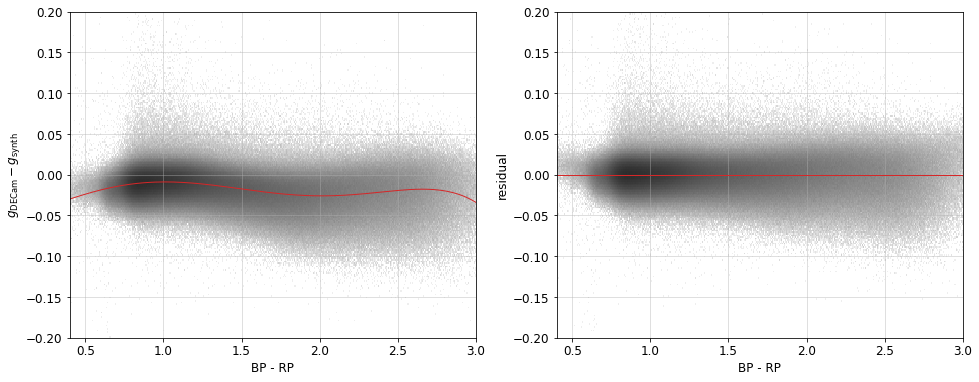

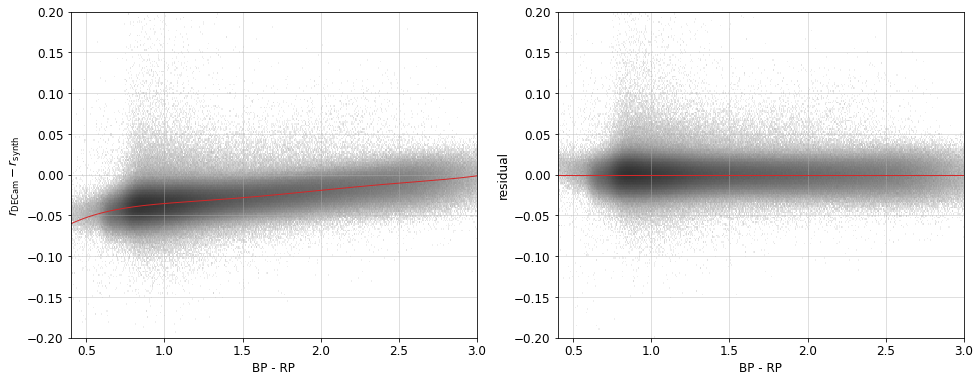

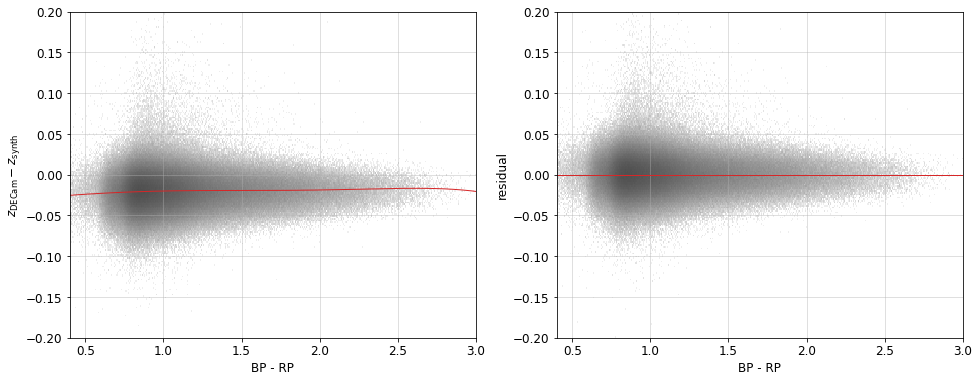

In [25]:
for band in ['g', 'r', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]

    y_predict = poly_val1d(x, coeffs[band])
    x_plot = np.linspace(0, 4, 200)
    y_plot = poly_val1d(x_plot, coeffs[band])

    xbins, ybins = np.linspace(0.4, 3., 400), np.linspace(-0.2, 0.2, 200)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    ax = axes[0]
    ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.plot(x_plot, y_plot, '-', lw=1., color='C3')
    ax.set_xlabel('BP - RP')
    ylabel = '$'+band+'_\mathrm{DECam} - '+band+'_\mathrm{synth}$'
    ax.set_ylabel(ylabel)
    ax.axis([0.4, 3., -0.2, 0.2])
    ax.grid(alpha=0.5)
    ax = axes[1]
    ax.hist2d(x, y-y_predict, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.axhline(0, lw=1, color='C3', ls='-')
    ax.set_xlabel('BP - RP')
    ax.set_ylabel('residual')
    ax.axis([0.4, 3., -0.2, 0.2])
    ax.grid(alpha=0.5)
    plt.show()

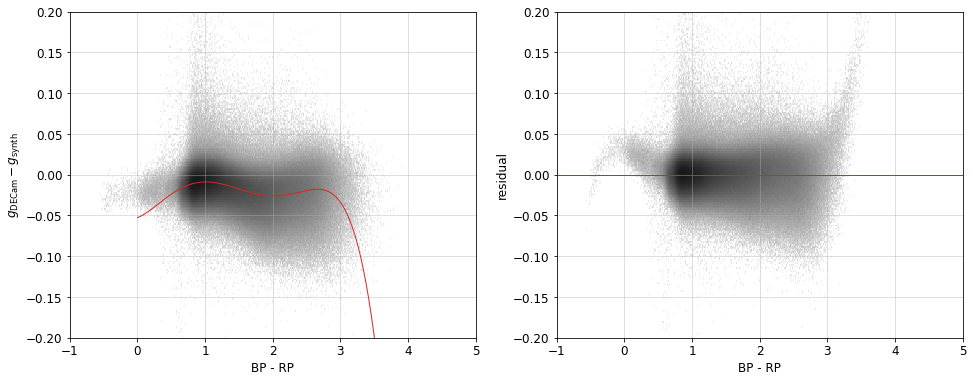

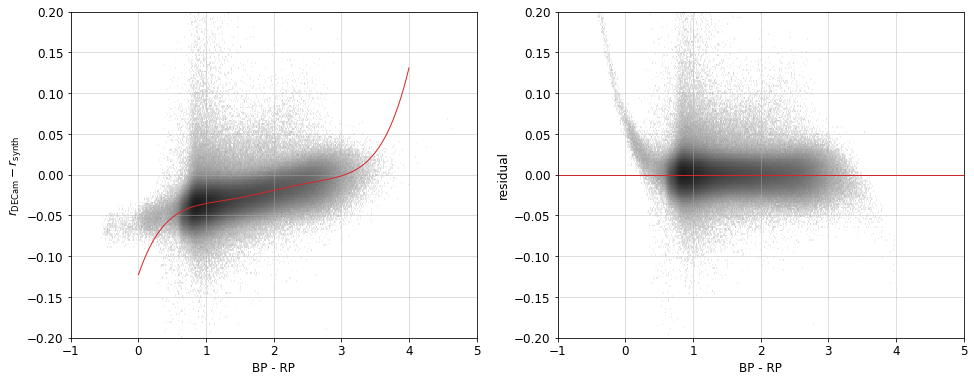

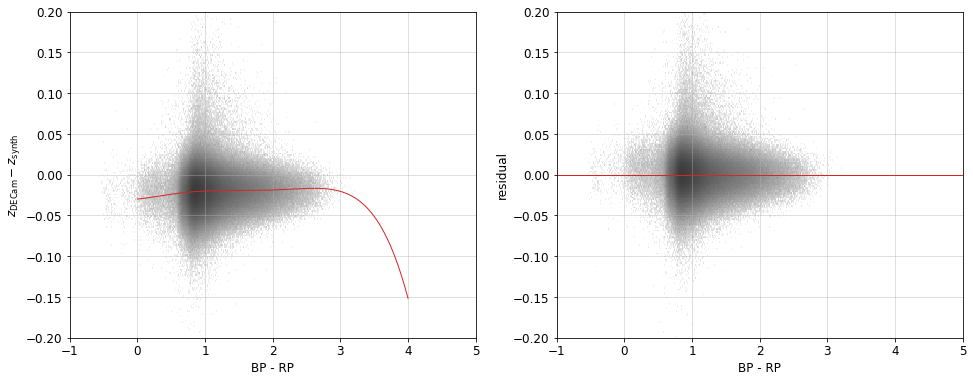

In [26]:
for band in ['g', 'r', 'z']:
    mask = (cat['ANYMASK_'+band.upper()]==0)
    x = (gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG'])[mask]
    y = (cat[band+'mag']-gaia[band+'mag'])[mask]

    y_predict = poly_val1d(x, coeffs[band])
    x_plot = np.linspace(0, 4, 200)
    y_plot = poly_val1d(x_plot, coeffs[band])

    xbins, ybins = np.linspace(-1, 5, 400), np.linspace(-0.2, 0.2, 200)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    ax = axes[0]
    ax.hist2d(x, y, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.plot(x_plot, y_plot, '-', lw=1., color='C3')
    ax.set_xlabel('BP - RP')
    ylabel = '$'+band+'_\mathrm{DECam} - '+band+'_\mathrm{synth}$'
    ax.set_ylabel(ylabel)
    ax.axis([-1, 5, -0.2, 0.2])
    ax.grid(alpha=0.5)
    ax = axes[1]
    ax.hist2d(x, y-y_predict, bins=[xbins, ybins], cmap='gray_r', norm=LogNorm(vmin=1, vmax=20000))
    ax.axhline(0, lw=1, color='C3', ls='-')
    ax.set_xlabel('BP - RP')
    ax.set_ylabel('residual')
    ax.axis([-1, 5, -0.2, 0.2])
    ax.grid(alpha=0.5)
    plt.show()

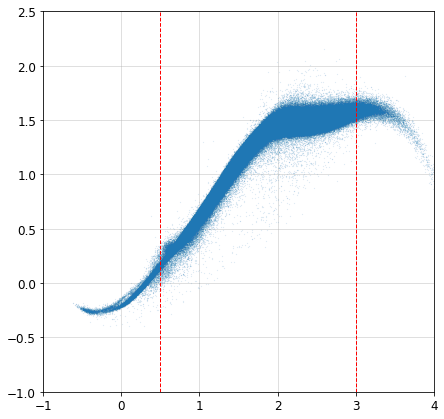

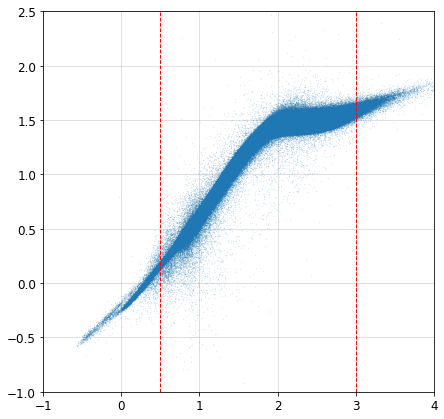

In [27]:
x = gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']
y = gaia['gmag_std'] - gaia['rmag_std']
mask = (x<100)
plt.figure(figsize=(7, 7))
plt.plot(x[mask], y[mask], '.', ms=0.1)
plt.axis([-1, 4, -1, 2.5])
plt.axvline(0.5, lw=1, ls='--', color='r')
plt.axvline(3., lw=1, ls='--', color='r')
plt.grid(alpha=0.5)
plt.show()

x = gaia['PHOT_BP_MEAN_MAG']-gaia['PHOT_RP_MEAN_MAG']
y = cat['gmag'] - cat['rmag']
mask = (x<100)
mask &= (cat['ANYMASK_G']==0) & (cat['ANYMASK_R']==0)
plt.figure(figsize=(7, 7))
plt.plot(x[mask], y[mask], '.', ms=0.1)
plt.axis([-1, 4, -1, 2.5])
plt.axvline(0.5, lw=1, ls='--', color='r')
plt.axvline(3., lw=1, ls='--', color='r')
plt.grid(alpha=0.5)
plt.show()